![](img/ppgcc.png)

# Exploração dos dados - Mineração de Dados

In [1]:
# imports

# datetime
import datetime

# logging
import logging

# warnings
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

# numpy
import numpy as np

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# SQLite3
import sqlite3

# scipy
import scipy

# debug
import pdb

In [2]:
# reads csv file into pandas dataframe
sns.set()

# db
db = "/home/frederico/virtualenvs/mineracao/datasets/juiz_de_fora.db"

# connection
conn = sqlite3.connect(db)
df = pd.read_sql("SELECT * FROM alunos", conn)

In [3]:
df.columns

Index(['id_escola', 'nom_escola', 'nivel', 'etapa', 'id_turma', 'turma',
       'turno', 'atendimento', 'ano', 'matricula', 'id_aluno', 'sexo',
       'nascimento', 'etnia', 'cond_matricula', 'status', 'responsavel',
       'data_matricula', 'especial', 'rua', 'numero', 'bairro', 'cidade', 'uf',
       'cep', 'transp_pub', 'inicio_periodo', 'termino_periodo', 'cegueira',
       'baixa_visao', 'surdez', 'deficiencia_auditiva', 'deficiencia_fisica',
       'deficiencia_multipla', 'autismo_infantil', 'sindrome_de_asperger',
       'sindrome_de_rett', 'tdi', 'superdotacao', 'surdocegueira',
       'deficiencia_intelectual'],
      dtype='object')

In [4]:
df.shape

(43672, 41)

In [5]:
df.head()

id_escola            nom_escola nivel etapa  id_turma               turma  \
0   31070947  EM MARILIA DE DIRCEU     2     1    116561  Primeiro Período A   
1   31070947  EM MARILIA DE DIRCEU     2     1    116561  Primeiro Período A   
2   31070947  EM MARILIA DE DIRCEU     2     1    116561  Primeiro Período A   
3   31070947  EM MARILIA DE DIRCEU     2     1    116561  Primeiro Período A   
4   31070947  EM MARILIA DE DIRCEU     2     1    116561  Primeiro Período A   

  turno atendimento   ano  matricula           ...            \
0     1           1  2018   180002.0           ...             
1     1           1  2018   180004.0           ...             
2     1           1  2018   180009.0           ...             
3     1           1  2018   180011.0           ...             
4     1           1  2018   180012.0           ...             

   deficiencia_auditiva deficiencia_fisica deficiencia_multipla  \
0                     0                  0                    0   
1                     1                  0                    0   
2                     0                  0                    1   
3                     0                  0                    0   
4                     0                  0                    0   

  autismo_infantil sindrome_de_asperger sindrome_de_rett tdi superdotacao  \
0                0                    0                0   0            0   
1                0                    0                0   0            0   
2                0                    0                0   0            0   
3                0                    0                0   0            0   
4                0                    0                0   0            0   

  surdocegueira deficiencia_intelectual  
0             0                       0  
1             0                       0  
2             0                       0  
3             0                       0  
4             0                       0  

[5 rows x 41 columns]

In [6]:
df.status.value_counts()

0    41903
1     1440
2      321
3        8
Name: status, dtype: int64

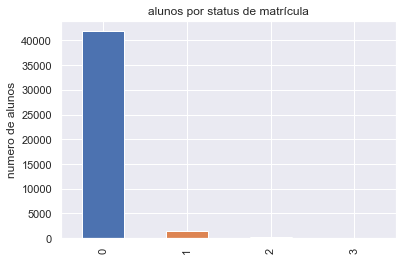

In [7]:
df.status.value_counts().plot(kind='bar')
plt.title('alunos por status de matrícula')
plt.ylabel('numero de alunos')
plt.show()

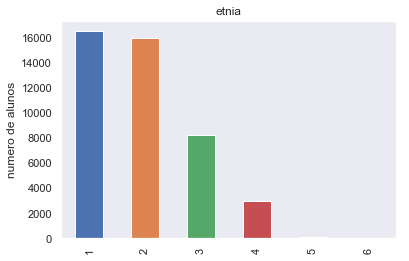

In [8]:
df.etnia.value_counts().plot(kind='bar')
plt.title('etnia')
plt.ylabel('numero de alunos')
plt.grid(False)
plt.show()

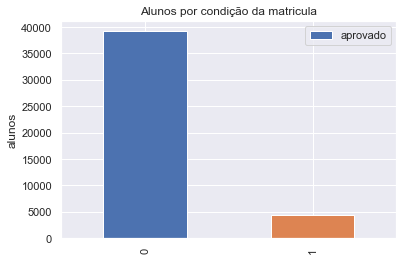

In [9]:
df.cond_matricula.value_counts().plot(kind='bar')
plt.title('Alunos por condição da matricula')
plt.legend(['aprovado', 'repetente'])
plt.ylabel('alunos')
plt.show()

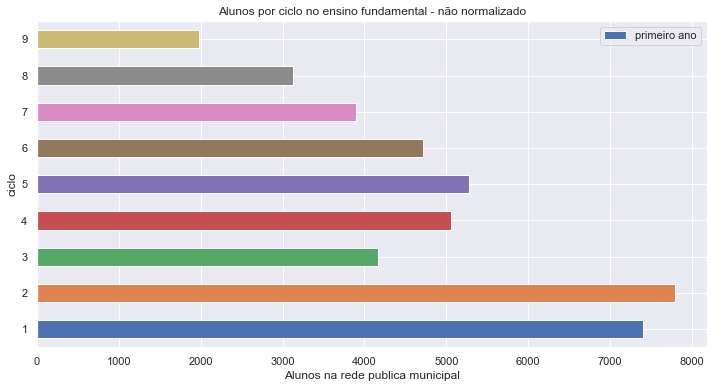

In [10]:
# Alunos nos ciclos fundamentais da rede publica municipal de Juiz de Fora
plt.figure(figsize=(12, 6))
df.etapa.value_counts()[[1, 0, 5, 3, 2, 4, 6, 7, 8]].plot(kind='barh')
plt.legend(['primeiro ano'])
plt.title('Alunos por ciclo no ensino fundamental - não normalizado')
plt.xlabel('Alunos na rede publica municipal')
plt.ylabel('ciclo')
# plt.savefig('img/alunos_ciclo.png')
plt.show()

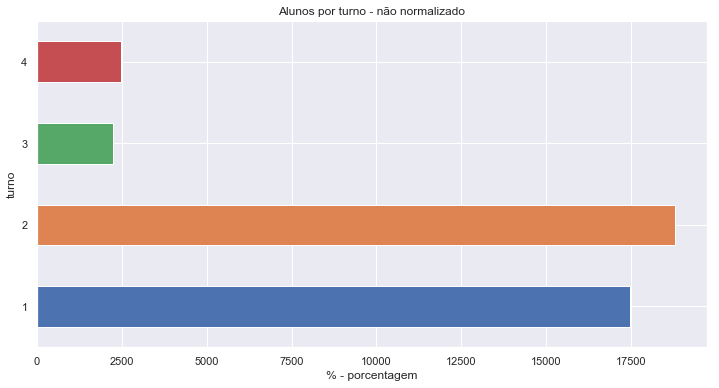

In [11]:
# Alunos por turno  na rede publica minicipal
plt.figure(figsize=(12, 6))
df.turno.value_counts()[[1, 0, 4, 2]].plot(kind='barh')
plt.title('Alunos por turno - não normalizado')
plt.xlabel('% - porcentagem')
plt.ylabel('turno')
plt.savefig('img/alunos_turno.png')
plt.show()

<Figure size 864x432 with 0 Axes>

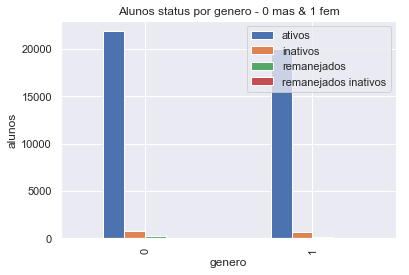

In [12]:
# Situaçao do aluno por sexo
plt.figure(figsize=(12, 6))
genero = df.groupby(['sexo', 'status'])['status'].count().unstack()
genero.plot(kind='bar')
plt.title('Alunos status por genero - 0 mas & 1 fem')
plt.legend(['ativos', 'inativos', 'remanejados', 'remanejados inativos'], loc='best')
plt.xlabel('genero')
plt.ylabel('alunos')
plt.savefig('img/alunos_situacao.png')
plt.show()

<Figure size 864x432 with 0 Axes>

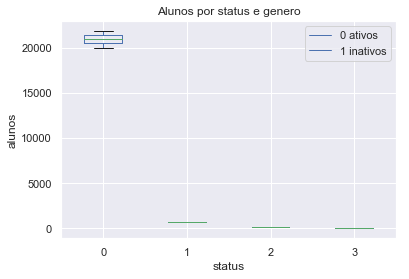

In [13]:
# boxplot
plt.figure(figsize=(12, 6))
box = df.groupby(['sexo', 'status'])['sexo'].count().unstack()
box.plot(kind='box')
plt.title('Alunos por status e genero')
plt.legend(['0 ativos', '1 inativos'])
plt.xlabel('status')
plt.ylabel('alunos')
plt.savefig('img/alunos_boxplot.png')
plt.show()

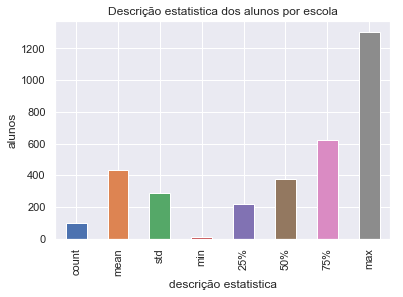

In [14]:
# descrição estatistica
distr = df.nom_escola.value_counts().describe()
distr.plot(kind='bar')
plt.title('Descrição estatistica dos alunos por escola')
plt.xlabel('descrição estatistica')
plt.ylabel('alunos')
# plt.savefig('img/descricao_estatistica.png')
plt.show()

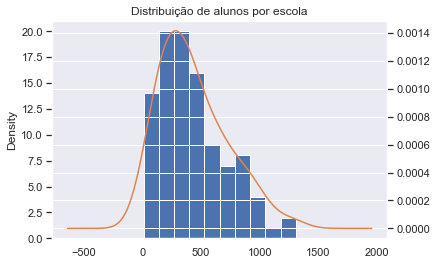

In [15]:
# distribuição de alunos por escola
his = df.nom_escola.value_counts()
ax0 = his.plot(kind='hist')
his.plot(kind='kde', ax=ax0, secondary_y=True)
plt.title('Distribuição de alunos por escola')
plt.savefig('img/distribuicao_por_ecola.png')
plt.show()
plt.show()

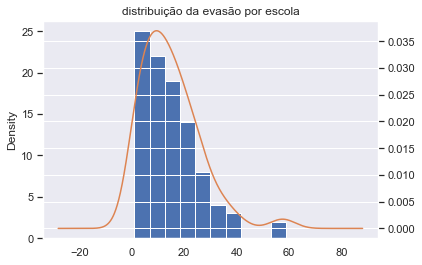

In [16]:
# distribuição da evasão por escola
x = df.loc[(df['status'] == '1') & (df['nom_escola']), ['status', 'nom_escola']]
des_escola = x.groupby(['nom_escola']).count().unstack()
ax1 = des_escola.plot(kind='hist')
des_escola.plot(kind='kde', ax=ax1, secondary_y=True)
plt.title('distribuição da evasão por escola')
plt.savefig('img/distribuicao_evasao_escola.png')
plt.show()

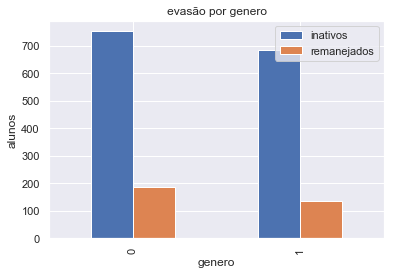

In [17]:
# evasao por genero
evade = df.groupby(['sexo', 'status'])['status'].count().unstack()
evade[['1', '2']].plot(kind='bar')
plt.title('evasão por genero')
plt.legend(['inativos', 'remanejados'])
plt.xlabel('genero')
plt.ylabel('alunos')
plt.savefig('img/evasao_genero.png')
plt.show()

In [18]:
# Pearson
df.corr()

id_escola  id_turma       ano  matricula  id_aluno
id_escola   1.000000 -0.052972  0.020292   0.133783  0.048775
id_turma   -0.052972  1.000000  0.050518   0.064691 -0.092786
ano         0.020292  0.050518  1.000000   0.053070 -0.079601
matricula   0.133783  0.064691  0.053070   1.000000 -0.366776
id_aluno    0.048775 -0.092786 -0.079601  -0.366776  1.000000

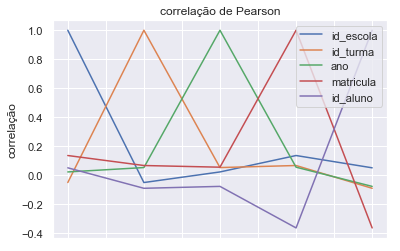

In [19]:
# correlacao
df[['id_escola', 'id_turma', 'ano', 'matricula', 'id_aluno']].corr().plot()
plt.title('correlação de Pearson')
plt.ylabel('correlação')
plt.savefig('img/correlacao.png')
plt.show()

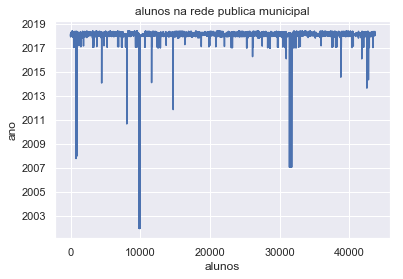

In [20]:
# data matricula
df['data_matricula'] = pd.DatetimeIndex(df['data_matricula']).normalize()
df['data_matricula'].plot()
plt.title('alunos na rede publica municipal')
plt.xlabel('alunos')
plt.ylabel('ano')
plt.savefig('img/alunos_na_rede_publica.png')
plt.show()

In [21]:
# dez maiores escolas da rede
maiores = df.nom_escola.value_counts().head(10)
maiores.values

array([1307, 1211, 1054, 1046, 1007,  993,  923,  892,  885,  880])

In [22]:
# dez menores escolas da rede
menores = df.nom_escola.value_counts().tail(10)
menores.values

array([105,  96,  86,  68,  65,  25,  11,  10,  10,   9])

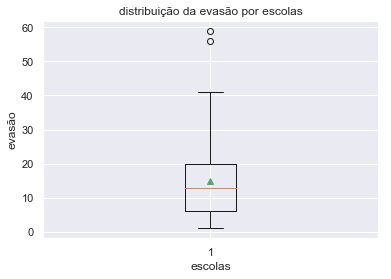

In [23]:
alunos_por_escola = df.nom_escola.value_counts()
alunos_evasao = df.groupby(['nom_escola', 'status'])['status']
alunos_por_escola.values # x
x = df.loc[(df['status'] == '1') & (df['nom_escola']), ['nom_escola', 'status']]
evasao_por_escola = x['nom_escola'].value_counts()
evasao_por_escola.values # y

plt.boxplot(evasao_por_escola, showmeans=True)
plt.title('distribuição da evasão por escolas')
plt.xlabel('escolas')
plt.ylabel('evasão')
plt.show()

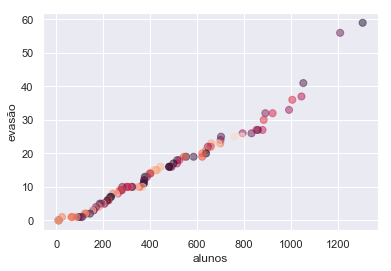

In [24]:
# alunos por escola (variavel independente)
alunos_por_escola = df.nom_escola.value_counts()
X = alunos_por_escola.values # x

#alunos_evasao = df.groupby(['nom_escola', 'status'])['status']
y = df.loc[(df['status'] == '1') & (df['nom_escola']), ['nom_escola', 'status']]
Y_perdas = y['nom_escola'].value_counts()

w = Y_perdas.values # y 97
z = np.array([0, 0, 0, 0])
Y = np.concatenate((w, z))

A = 50
B = 0.09914773
area = np.array([A, A, A, A, A])
colors = np.random.rand(101)
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
plt.title('')
plt.xlabel('alunos')
plt.ylabel('evasão')
plt.show()

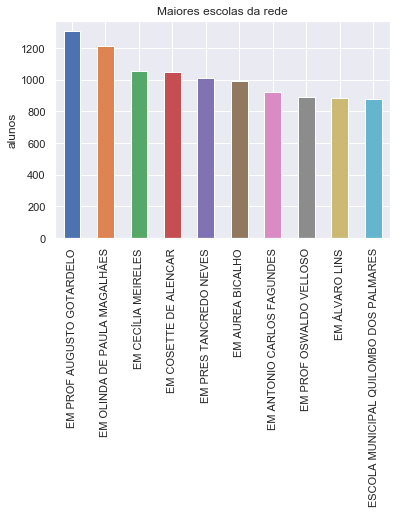

In [25]:
escolas = df.nom_escola.value_counts()
escolas.head(10).plot(kind='bar')
plt.title('Maiores escolas da rede')
plt.ylabel('alunos')
plt.show()

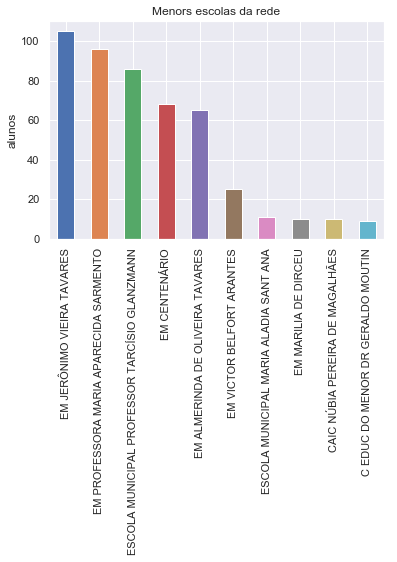

In [26]:
escolas = df.nom_escola.value_counts()
escolas.tail(10).plot(kind='bar')
plt.title('Menors escolas da rede')
plt.ylabel('alunos')
plt.show()

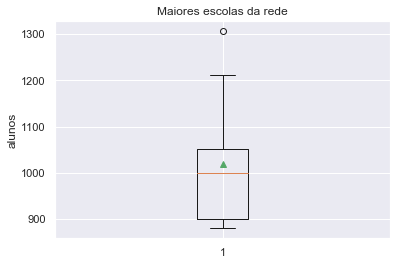

In [27]:
escolas = df.nom_escola.value_counts()
plt.boxplot(escolas.head(10), showmeans=True)
plt.title('Maiores escolas da rede')
plt.ylabel('alunos')
plt.show()

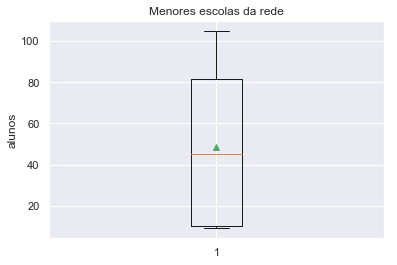

In [28]:
escolas = df.nom_escola.value_counts()
plt.boxplot(escolas.tail(10), showmeans=True)
plt.title('Menores escolas da rede')
plt.ylabel('alunos')
plt.show()

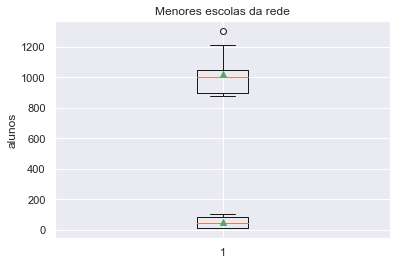

In [29]:
escolas = df.nom_escola.value_counts()
plt.boxplot(escolas.tail(10), showmeans=True)
plt.boxplot(escolas.head(10), showmeans=True)
plt.title('Menores escolas da rede')
plt.ylabel('alunos')
plt.show()

In [30]:
# 10 escolas com evasao (maiores perdas)
y = df.loc[(df['status'] == '1') & (df['nom_escola']), ['nom_escola', 'status']]
Y_perdas = y['nom_escola'].value_counts()
Y_perdas.head(10).values

# 10 escolas com evasao  (menores perdas)
x = df.nom_escola.value_counts()
Esc = x.head(10).values
Per = Y_perdas.head(10).values
T0 = (Per / Esc) * 100
T0 = np.around(T0, decimals=2)
# Escolas = np.array([[1,2,3,4,5,6,7,8,9,10], Esc, Per, T0])
Escolas = np.array([Esc, Per, T0])

print(Esc)
print(Per)
print(T0)

[1307 1211 1054 1046 1007  993  923  892  885  880]
[59 56 41 37 36 33 32 32 30 27]
[4.51 4.62 3.89 3.54 3.57 3.32 3.47 3.59 3.39 3.07]


In [31]:
# 10 escolas com evasao (menores perdas)
y = df.loc[(df['status'] == '1') & (df['nom_escola']), ['nom_escola', 'status']]
Y_perdas = y['nom_escola'].value_counts()
Y_perdas.tail(10).values

# 10 escolas com evasao  (menores perdas)
x = df.nom_escola.value_counts()

esc = x.tail(10).values
per = Y_perdas.tail(10).values
t0 = (per / esc) * 100
t0 = np.around(t0, decimals=2)
escolas = np.array([esc, per, t0])

print(esc)
print(per)
print(t0)

[105  96  86  68  65  25  11  10  10   9]
[2 2 2 1 1 1 1 1 1 1]
[ 1.9   2.08  2.33  1.47  1.54  4.    9.09 10.   10.   11.11]


In [32]:
print("Evasão nas dez maiores escolas")
dE = pd.DataFrame(Escolas, index=['alunos', 'evasão', '%'])
dE.head()

Evasão nas dez maiores escolas


0        1        2        3        4       5       6       7  \
alunos  1307.00  1211.00  1054.00  1046.00  1007.00  993.00  923.00  892.00   
evasão    59.00    56.00    41.00    37.00    36.00   33.00   32.00   32.00   
%          4.51     4.62     3.89     3.54     3.57    3.32    3.47    3.59   

             8       9  
alunos  885.00  880.00  
evasão   30.00   27.00  
%         3.39    3.07

In [33]:
print("Evasão nas dez menores escolas")
de = pd.DataFrame(escolas, index=['alunos', 'evasão', '%'])
de.head()

Evasão nas dez menores escolas


0      1      2      3      4     5      6     7     8      9
alunos  105.0  96.00  86.00  68.00  65.00  25.0  11.00  10.0  10.0   9.00
evasão    2.0   2.00   2.00   1.00   1.00   1.0   1.00   1.0   1.0   1.00
%         1.9   2.08   2.33   1.47   1.54   4.0   9.09  10.0  10.0  11.11